## Trabalho 1 PDI

- **Alunos:** Anderson Coutinho, Gabriel Alexandre e Laura Francine.
- **Prazo de entrega:** Até 9h do dia 24/10.

### Objetivos:

1. Sistema de conversão de imagem.
2. Relatório. (PDF, introdução (contextualização e apresentação do tema, fundamentação teórica, objetivos), materiais e métodos (descrição das atividades desenvolvidas e das ferramentas e conhecimentos utilizados), resultados, discussão (problemas e dificuldades encontradas, comentários críticos sobre os resultados) e conclusão).

# ---------------------------------------------------------------------------------

![image](apple.png)

## Sistema

In [2]:
from PIL import Image 
from PIL import ImageFilter
from PIL import ImageEnhance
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
Shapes = Image.open('apple.png')
print('Mode:',Shapes.mode)
print('Size:',Shapes.size)
print('Type:',type(Shapes))

In [ ]:
plt.imshow(Shapes)

### 1- Conversão RGB-YIQ-RGB (cuidado com os limites de R, G e B na volta!).

In [ ]:
ShapesArray = np.array(Shapes)

def convertToYIQ(image):
    yiq = np.array(image, dtype=float)
    
    yiq[:,:,0] = (image[:,:,0] * 0.299) + (image[:,:,1] * 0.587) + (image[:,:,2] * 0.114)
    yiq[:,:,1] = (image[:,:,0] * 0.596) - (image[:,:,1] * 0.274) - (image[:,:,2] * 0.322)
    yiq[:,:,2] = (image[:,:,0] * 0.211) - (image[:,:,1] * 0.523) + (image[:,:,2] * 0.312)
    return yiq

def convertToRGB(image):
    rgb = np.array(image, dtype=int)

    rgb[:,:,0] = image[:,:,0] + (image[:,:,1] * 0.956) + (image[:,:,2] * 0.621)
    rgb[:,:,1] = image[:,:,0] - (image[:,:,1] * 0.272) - (image[:,:,2] * 0.647)
    rgb[:,:,2] = image[:,:,0] - (image[:,:,1] * 1.106) + (image[:,:,2] * 1.703)
    
    rgb = np.clip(rgb, 0, 255)
    return rgb

imageYIQ = convertToYIQ(ShapesArray)
imageRGB = convertToRGB(imageYIQ)
plt.imshow(imageRGB)

### 2- Negativo. Duas formas de aplicação devem ser testadas: em RGB (banda a banda) e na banda Y, seguida de conversão para RGB.

In [ ]:
ShapesArray = np.array(Shapes)

def convertToNegativeRGB(image):
    negativeRGB = np.array(image, dtype=int)
    
    negativeRGB[:,:,0] = 255 - image[:,:,0]
    negativeRGB[:,:,1] = 255 - image[:,:,1]
    negativeRGB[:,:,2] = 255 - image[:,:,2]
    
    return negativeRGB

def convertToNegativeYIQ(image):
    negativeYIQ = np.array(image, dtype=float)
    
    negativeYIQ[:,:,0] = 255 - image[:,:,0]
    
    return negativeYIQ

#plt.imshow(convertToNegativeRGB(ShapesArray))   

imageYIQ = convertToYIQ(ShapesArray)
imageYIQ = convertToNegativeYIQ(imageYIQ)
imageRGB = convertToRGB(imageYIQ)
plt.imshow(imageRGB) 

### 3- Correlação m x n sobre R, G e B, com offset, e filtro e pivô definidos em um arquivo (txt) a parte. Testar com filtros Média e Sobel horizontal e vertical, e explicar os resultados. Para visualização do resultado do Sobel, utilize valor absoluto seguido por expansão de histograma para [0, 255].

In [ ]:
import cv2
import numpy as np

imagem = cv2.imread("apple.png")
imagem = cv2.resize(imagem, (800,600))
#filt = np.array([(1,1,1),(1,1,1),(1,1,1)])*(1/9) #filtro 3X3
filt = np.array([(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1)])*(1/25) #filtro 3X3

S = imagem.shape
F = filt.shape

imagemGray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2.imshow('original',imagemGray)
cv2.waitKey(0)

R = S[0] + F[0] - 1
C = S[1] + F[1] - 1
Z = np.zeros((R, C))

for i in range(S[0]):
    for j in range(S[1]):
        Z[i+np.int((F[0]-1)/2), j+np.int((F[1]-1)/2)] = imagemGray[i,j]
print(Z)

for i in range(S[0]):
    for j in range(S[1]):
        k = Z[i:i+F[0], j: j+F[1]]
        l = np.sum(k*filt)
        ImagemGray[i,j]= l
cv2.imshow('final', imagemGray)
cv2.waitKey(0)
    

### 4- Filtro mediana m x n, com m e n ímpares, sobre as bandas R, G e B.

### 5- Controle de saturação no HSB, seguido de conversão para RGB.

In [ ]:
#Shapes = Image.open('apple.png')
#Shapes = Image.open('DancingInWater.jpg')
#Shapes = Image.open('Shapes.png')
#Shapes = Image.open('testpat.png')
#ShapesArray = np.array(Shapes)

import numpy as np 
from PIL import Image 
from PIL import ImageFilter
from PIL import ImageEnhance
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
import math
import timeit
import colorsys
 
def im_rgb_to_hsb(s, image):
    
    teste = np.array(image, dtype=float)
    rows = len(image)
    columns = len(image[0])
    for i in range(rows):
        for j in range(columns):
            teste[i][j] = colorsys.rgb_to_hsv(image[i][j][0], image[i][j][1], image[i][j][2])
            
            teste[i][j][1] = s
            
            teste[i][j] = colorsys.hsv_to_rgb(teste[i][j][0], teste[i][j][1], teste[i][j][2])
    teste = np.array(teste, dtype=int)
    
    return teste

Shapes = Image.open('apple.png')
ShapesArray = np.array(Shapes)

teste = im_rgb_to_hsb(1, ShapesArray)
plt.imshow(teste)
plt.show()  

/tmp/ipykernel_56949/4157311255.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


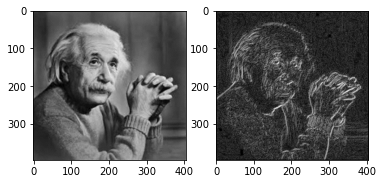

<Figure size 432x288 with 0 Axes>

In [22]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# #---------------------------------------------------------------------------------------------------------------------
# PART I - Transforming an image from color to grayscale
# #---------------------------------------------------------------------------------------------------------------------

# Here we import the image file as an array of shape (nx, ny, nz)

input_image = Image.open('anderson.jpeg')  # this is the array representation of the input image
[nx, ny, nz] = np.shape(input_image)  # nx: height, ny: width, nz: colors (RGB)
ShapesArray = np.array(input_image)
# Extracting each one of the RGB components
r_img, g_img, b_img = ShapesArray[:, :, 0], ShapesArray[:, :, 1], ShapesArray[:, :, 2]

# The following operation will take weights and parameters to convert the color image to grayscale
gamma = 1.400  # a parameter
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722  # weights for the RGB components respectively
grayscale_image = r_const * r_img * gamma + g_const * g_img * gamma + b_const * b_img ** gamma

# This command will display the grayscale image alongside the original image
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
#fig1.show()

# Here we define the matrices associated with the Sobel filter
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  # we need to know the shape of the input grayscale image
sobel_filtered_image = np.zeros(shape=(rows, columns))  # initialization of the output image array (all elements are 0)

# Now we "sweep" the image in both x and y directions and compute the output
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(np.abs(gx * 2 + gy * 2))  # calculate the "hypotenuse"
        # sobel_filtered_image[i + 1, j + 1] = np.array(gx)

# Display the original image and the Sobel filtered image
fig2 = plt.figure(2)
#ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
#plt.imshow(sobel_filtered_image)
fig2.show()

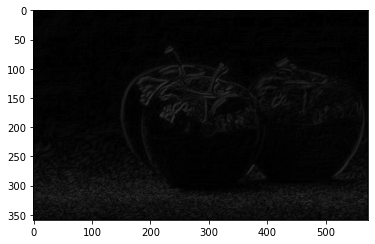

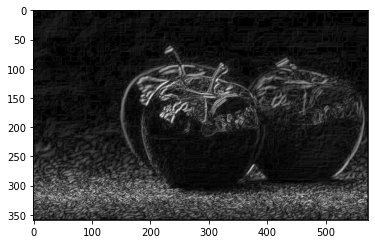

In [16]:
from PIL import Image 
from PIL import ImageFilter
from PIL import ImageEnhance
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os

import cv2
import numpy as np

def Hist(image):
    H=np.zeros(shape=(256,1))
    rows = len(image)
    columns = len(image[0])
    for i in range(rows):
        for j in range(columns):
            k=image[i,j]
            H[k,0]=H[k,0]+1
            
    return H

imagem = np.array(sobel_filtered_image)
imagem = np.abs(imagem)

imagem = Image.fromarray(imagem)
Shapes_L = imagem.convert('L')
imagem_F = np.array(Shapes_L)

imagemGrayFinal = Image.fromarray(imagem_F.copy())
Shapes_L1 = imagemGrayFinal.convert('RGB')    
imagem_FF = np.array(Shapes_L1)   

plt.imshow(imagem_FF)
plt.show()

rows = len(imagem_F)
columns = len(imagem_F[0])

histg = Hist(imagem_F)
rmax = np.argmax(histg)
rmin = np.argmin(histg)

rmax = 0
rmin = 255

for i, item in enumerate(histg):
    if item[0] > 0 and i > rmax:
        rmax = i
    if item[0] > 0 and i < rmin:
        rmin = i

imagemGray = imagem_F.copy()
for i in range(rows):
    for j in range(columns):
        if(rmax - rmin) <= 0: k = 0
        else: k = np.abs(np.round(((imagem_F[i, j] - rmin) *255)/(rmax - rmin)))
        imagemGray[i,j] = k

imagemGray = np.abs(imagemGray)
imagemGray = np.clip(imagemGray, 0, 255)
imagemGrayFinal2 = Image.fromarray(imagemGray)
Shapes_L11 = imagemGrayFinal2.convert('RGB')    
imagem_FF2 = np.array(Shapes_L11)   

# print(imagemGray)
plt.imshow(imagem_FF2)
plt.show()